In [ ]:
#!python -m spacy download pt_core_news_sm matplotlib

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df_news = pd.read_csv("../data/noticias_preprocessada.csv")

In [3]:
df_news= df_news.drop(columns=["Unnamed: 0"])

In [4]:
df_news.head()

,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cluster_pca,cleaned_body
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,3,audiência custódia justiça amazonas decretou s...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,6,vista aérea santarém ádrio ad produções paraen...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,3,vídeo mostra assassino shinzo abe atirou costa...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,4,relator stf fachin vota marco temporal demarca...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,6,pedido vista análise processo ministro alexand...


In [5]:
df_news.shape

(255603, 12)

In [18]:
# Load Portuguese model
nlp = spacy.load("pt_core_news_sm")

# Preprocess function with stopword removal
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)


In [19]:
df_news['cleaned_body'] = df_news['body'].apply(preprocess_text)

In [20]:
df_news.to_csv('noticias_preprocessada.csv')

In [21]:
df_news.head()

,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cluster_pca,cleaned_body
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,3,audiência custódia justiça amazonas decretou s...
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,6,vista aérea santarém ádrio ad produções paraen...
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,3,vídeo mostra assassino shinzo abe atirou costa...
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,4,relator stf fachin vota marco temporal demarca...
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,6,pedido vista análise processo ministro alexand...


In [15]:
# # Preprocess the dataset
# df_news['cleaned_title'] = df_news['title'].apply(preprocess_text)

# df_news['cleaned_caption'] = df_news['caption'].apply(preprocess_text)

In [25]:
df_news[["cleaned_title","cleaned_caption"]].head()

,cleaned_title,cleaned_caption
0,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...
1,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...
2,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...
3,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...
4,votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...


In [34]:
# Step 1: Combine the two columns into one (you can concatenate them or keep them separate)
df_news['combined_text'] = df_news['cleaned_title'] + " " + df_news['cleaned_caption']

In [23]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_news["combined_text"])

In [ ]:
# Apply K-Means clustering 
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

#score 0.01 demorou quase 1hr

In [5]:
# # Apply K-Means clustering
# num_clusters = 10  # You can adjust this based on your data
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# df_news['cluster'] = kmeans.fit_predict(X)

In [6]:
# # Evaluate the clustering
# sil_score = silhouette_score(X, kmeans.labels_)
# print(f"Silhouette Score: {sil_score:.2f}")

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Silhouette Score: 0.46


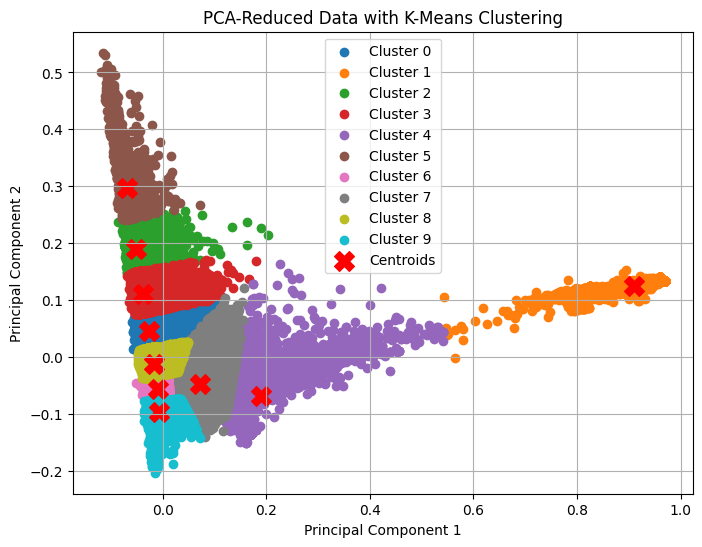

In [24]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.47


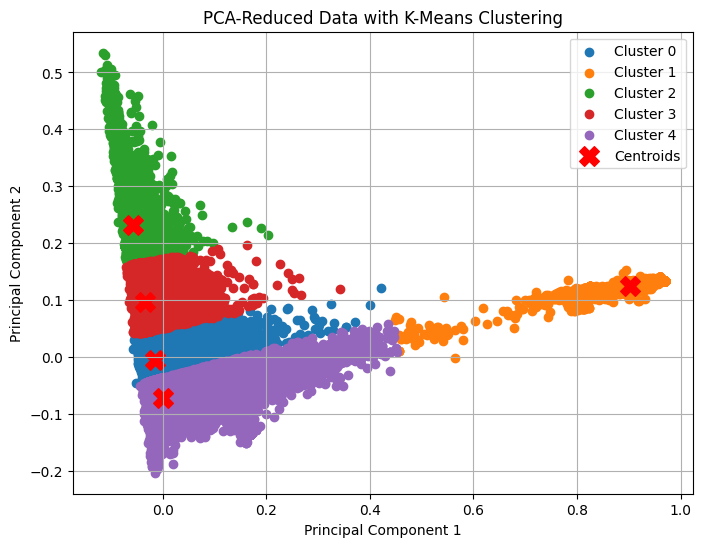

In [25]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.42


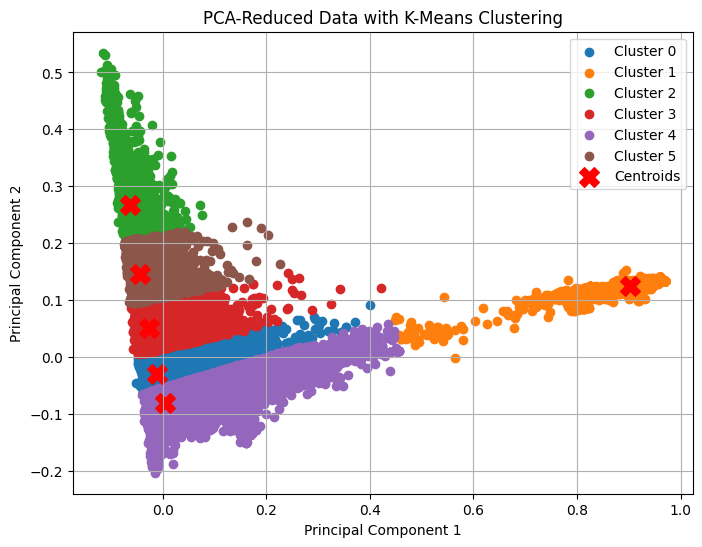

In [38]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.47


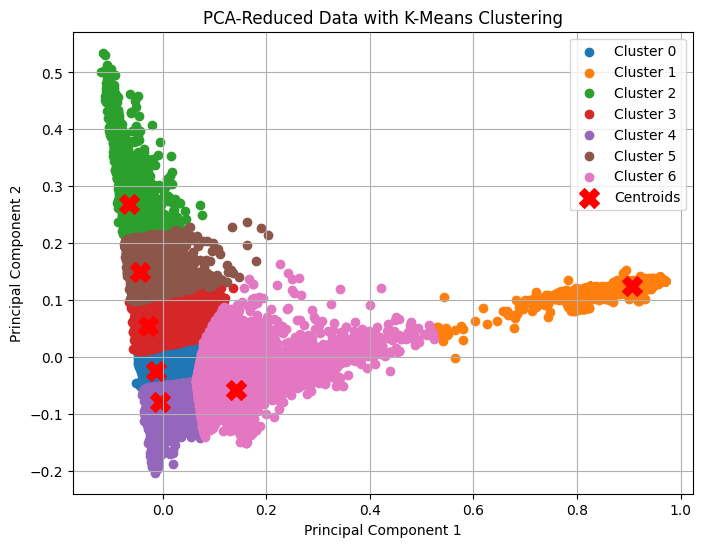

In [27]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.48


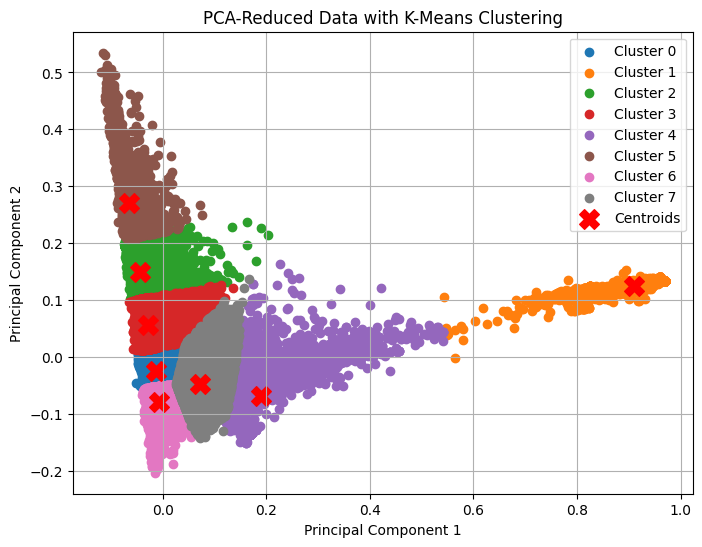

In [28]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.47


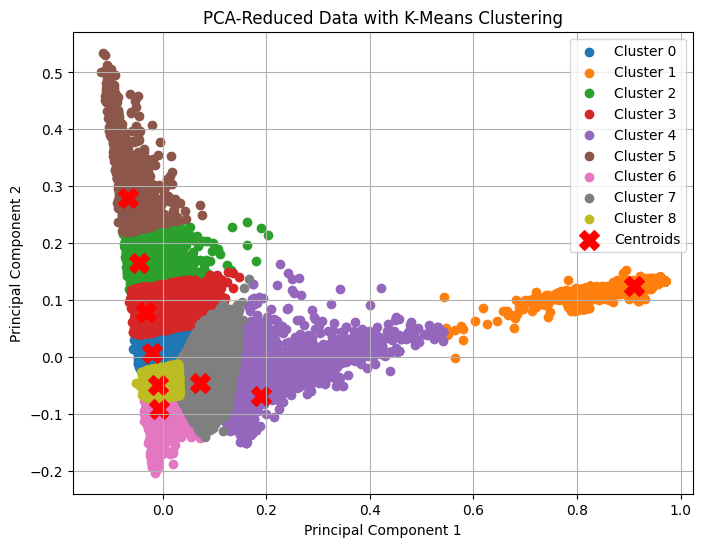

In [29]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.44


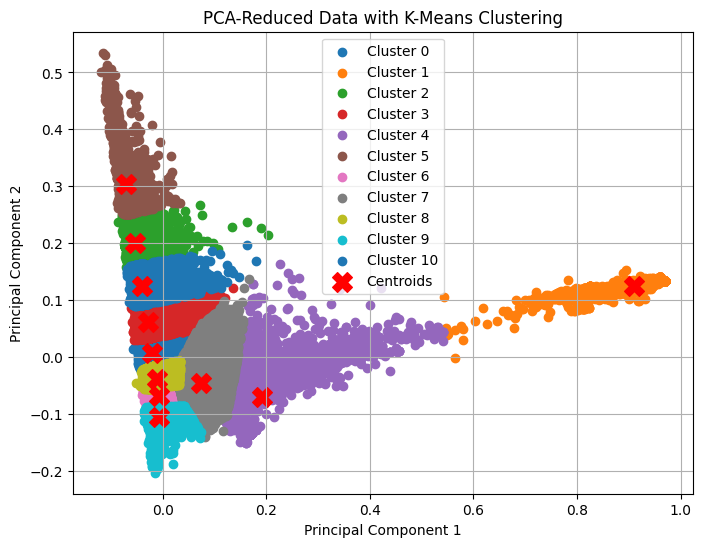

In [39]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 11
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.44


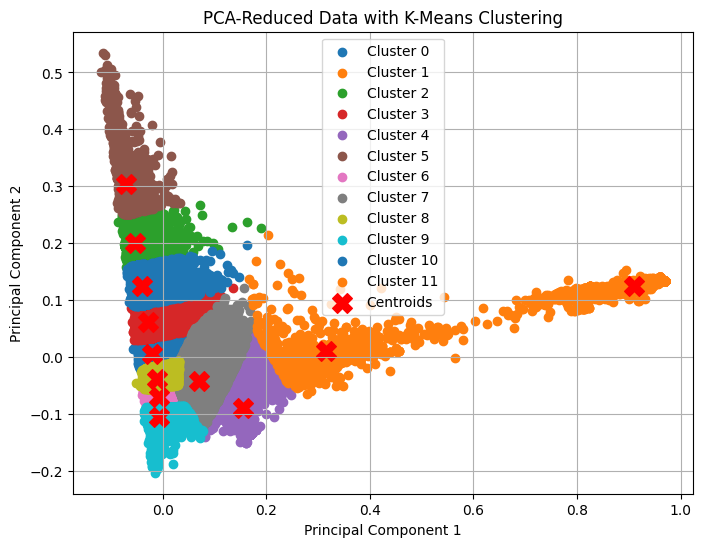

In [31]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 12
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.45


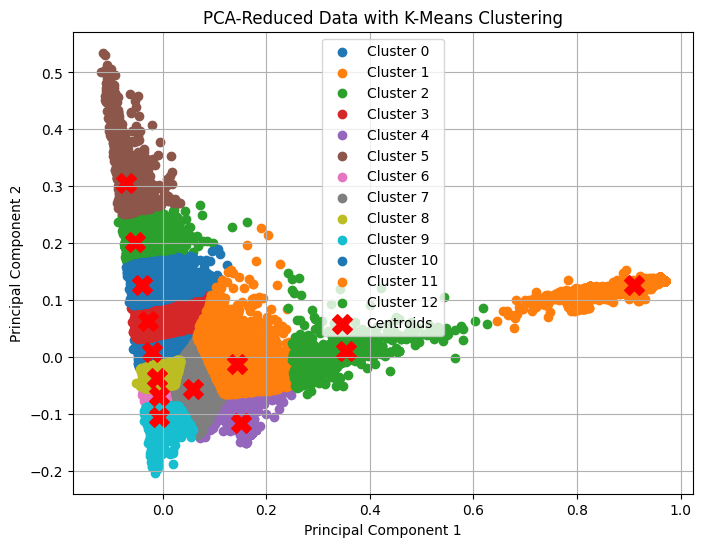

In [32]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 13
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.44


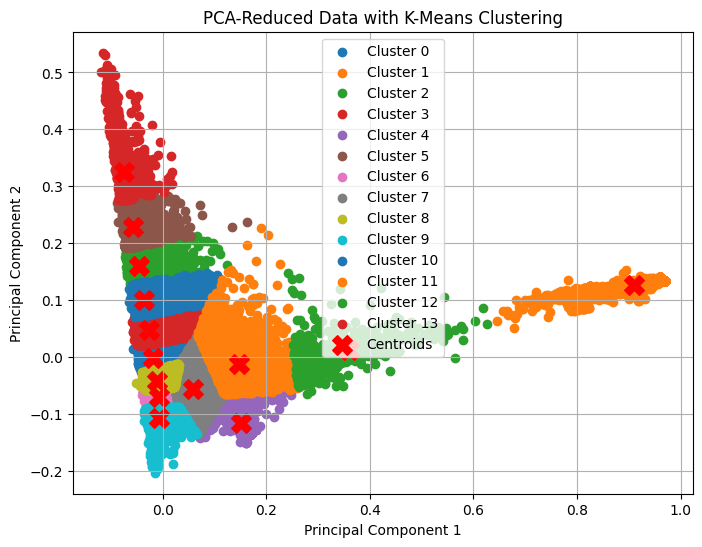

In [37]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 14
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.44


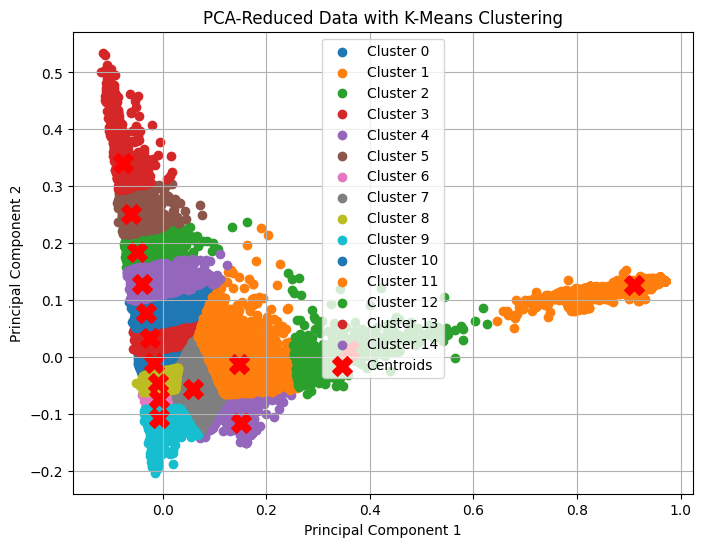

In [33]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.57


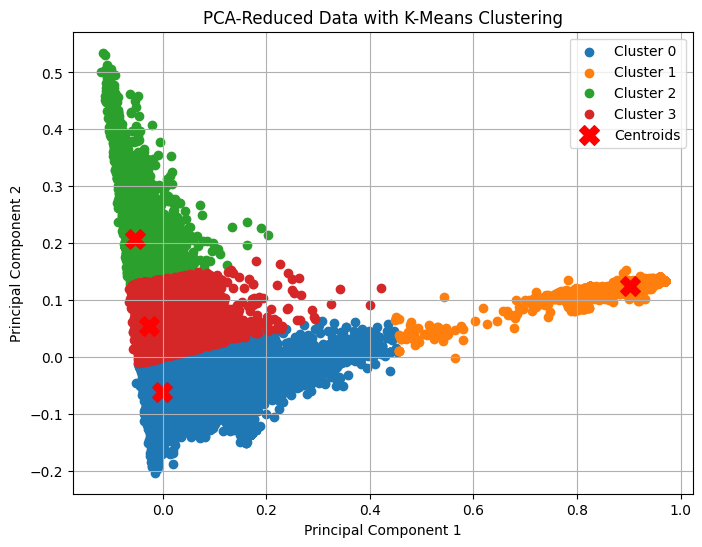

In [70]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


Silhouette Score: 0.65


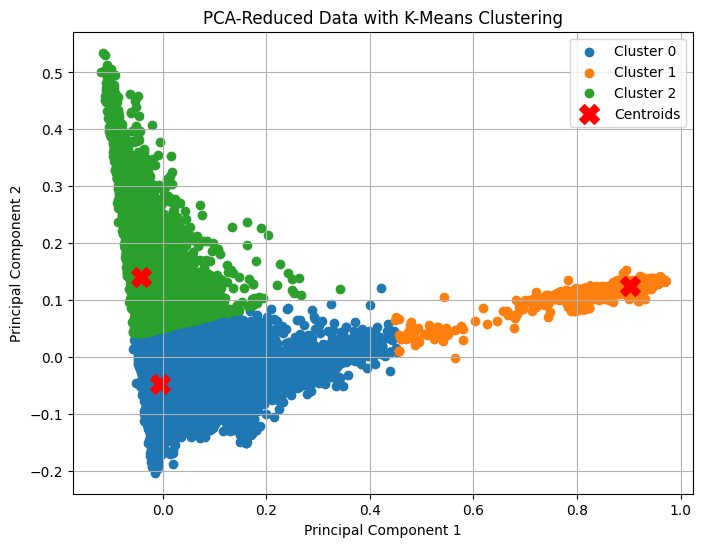

In [64]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

Silhouette Score: 0.88


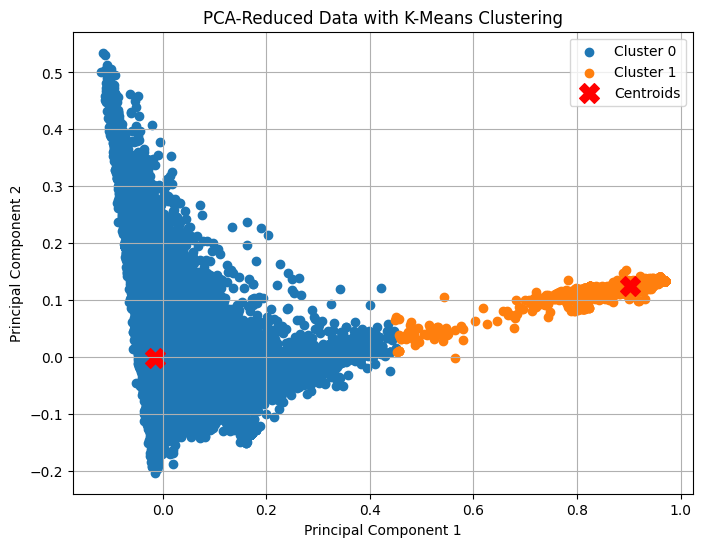

In [41]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [71]:
df_news['cluster'] = cluster_labels

In [56]:
# Count words
df_news['word_count'] = df_news['body'].apply(lambda x: len(str(x).split()))

In [72]:
# Save clusters and their tags into a .txt file
with open("clusters_analysis_n_4.txt", "w") as file:
    for cluster in range(num_clusters):
        file.write(f"\nCluster {cluster}:\n")
        cluster_texts = df_news[df_news['cluster'] == cluster]['title']
        file.write(f"{cluster_texts.tolist()}\n")

In [73]:
df_news.to_csv('noticias_com_features_4.csv')

In [49]:
df_news= df_news.drop(columns=["cluster_pca"])

In [61]:
df_news.head()

,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cleaned_body,cluster,word_count
0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,audiência custódia justiça amazonas decretou s...,0,704
1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,vista aérea santarém ádrio ad produções paraen...,0,728
2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,vídeo mostra assassino shinzo abe atirou costa...,0,1315
3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,relator stf fachin vota marco temporal demarca...,0,611
4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,pedido vista análise processo ministro alexand...,0,506


In [58]:
df_news.describe()

,cluster,word_count
count,255603.000000,255603.000000
mean,0.014918,501.111266
std,0.121224,431.405434
min,0.000000,1.000000
25%,0.000000,246.000000
50%,0.000000,393.000000
75%,0.000000,629.000000
max,1.000000,48779.000000


In [62]:
#com n=2
df_news['cluster'].value_counts()


cluster
0    251790
1      3813
Name: count, dtype: int64

In [68]:
#com n=3
df_news['cluster'].value_counts()

cluster
0    189571
2     62220
1      3812
Name: count, dtype: int64

In [74]:
#com n=4
df_news['cluster'].value_counts()

cluster
0    159645
3     63481
2     28665
1      3812
Name: count, dtype: int64

In [33]:
# # Assign tags manually or automatically
# cluster_tags = {
#     0: ,
#     1: ,
#     2: ,
#     3:
#     4:
#     5: "Política",
#     6: ""
#     # 7:
#     8:
#     9:
# }
# df_news['tag'] = df_news['cluster'].map(cluster_tags)

In [ ]:
# # Display the results
# print("\nTagged Articles:")
# print(df_news[['title', 'tag']])


política, economia, emprego, educação, saúde, meio ambiente, tecnologia, ciência, cultura e carros

In [1]:
import pandas as pd
df_news_clusterizada = pd.read_csv('noticias_com_features_3.csv')

In [2]:
df_news_clusterizada.head()

,Unnamed: 0,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cleaned_body,cluster,word_count
0,0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,audiência custódia justiça amazonas decretou s...,2,704
1,1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,vista aérea santarém ádrio ad produções paraen...,0,728
2,2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,vídeo mostra assassino shinzo abe atirou costa...,2,1315
3,3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,relator stf fachin vota marco temporal demarca...,0,611
4,4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,pedido vista análise processo ministro alexand...,0,506


In [3]:
import numpy as np

# Convert the string column to datetime
df_news_clusterizada["data"] = pd.to_datetime(df_news_clusterizada["issued"])

In [4]:
df_news_clusterizada.head()

,Unnamed: 0,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cleaned_body,cluster,word_count,data
0,0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,audiência custódia justiça amazonas decretou s...,2,704,2022-06-18 20:37:45+00:00
1,1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,vista aérea santarém ádrio ad produções paraen...,0,728,2019-06-20 17:19:52+00:00
2,2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,vídeo mostra assassino shinzo abe atirou costa...,2,1315,2022-07-08 08:55:52+00:00
3,3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,relator stf fachin vota marco temporal demarca...,0,611,2021-09-09 19:06:46+00:00
4,4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,pedido vista análise processo ministro alexand...,0,506,2021-09-15 19:16:13+00:00


In [20]:


# Find the most recent date
most_recent_date = df_news_clusterizada["data"].max()

# Calculate the difference in days
df_news_clusterizada["idade_em_dias"] = (most_recent_date - df_news_clusterizada["data"]).dt.days

# Assign weights using exponential decay (you can adjust the base for scaling)
df_news_clusterizada["peso"] = np.exp(-df_news_clusterizada["idade_em_dias"] / 30)  # 30 days as the decay factor

In [21]:
most_recent_date

Timestamp('2022-08-15 02:57:16+0000', tz='UTC')

In [22]:
# Adjust range to [0.5, 1]
new_min = 0.1
new_max = 1
df_news_clusterizada["peso_ajustado"] = df_news_clusterizada["peso"] * (new_max - new_min) + new_min


In [23]:
df_news_clusterizada.head(50)

,Unnamed: 0,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cleaned_body,cluster,word_count,data,idade_em_dias,peso,peso_ajustado
0,0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,audiência custódia justiça amazonas decretou s...,2,704,2022-06-18 20:37:45+00:00,57,1.495686e-01,0.234612
1,1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,vista aérea santarém ádrio ad produções paraen...,0,728,2019-06-20 17:19:52+00:00,1151,2.175547e-17,0.100000
2,2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,vídeo mostra assassino shinzo abe atirou costa...,2,1315,2022-07-08 08:55:52+00:00,37,2.913199e-01,0.362188
3,3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,relator stf fachin vota marco temporal demarca...,0,611,2021-09-09 19:06:46+00:00,339,1.237292e-05,0.100011
4,4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,pedido vista análise processo ministro alexand...,0,506,2021-09-15 19:16:13+00:00,333,1.511232e-05,0.100014
5,5,a9fd6d34-6f40-4c90-849b-2ad36f04fd6f,http://g1.globo.com/politica/noticia/2021/08/2...,2021-08-27 18:49:03+00:00,2023-06-07 17:46:42+00:00,O que é o marco temporal sobre terras indígena...,Marco temporal sobre terras indígenas: entenda...,Tese analisada pelo Supremo após recurso da Fu...,marco temporal terras indígenas entenda jogo j...,tese analisada supremo recurso funai prevê ind...,marco temporal terras indígenas entenda jogo j...,marco temporal terras indígenas entenda julgad...,0,943,2021-08-27 18:49:03+00:00,352,8.021915e-06,0.100007
6,6,c2893f07-08fe-4b4c-8904-92f0fedc3040,http://g1.globo.com/pop-arte/noticia/2021/10/0...,2021-10-08 12:17:37+00:00,2023-06-07 23:40:04+00:00,"Shannen Doherty, de 'Barrados no Baile', compa...","Shannen Doherty, de 'Barrados no Baile', compa...","Nas redes sociais, atriz afirmou que usou 'o h...",shannen doherty barrados baile compartilha his...,redes sociais atriz afirmou usou humor ajudou ...,shannen doherty barrados baile compartilha his...,shannen doherty barrados baile compartilha his...,0,289,2021-10-08 12:17:37+00:00,31